# Data Loading

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/Dataset .csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Data Cleaning

In [2]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Dropping duplicates, if any
data = data.drop_duplicates()
print("\nData shape after removing duplicates:", data.shape)


Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Data shape after removing duplicates: (9551, 21)


In [3]:
# Removing rows with missing 'Cuisines' values
data_cleaned = data.dropna(subset=['Cuisines'])

# Verifying the cleaning
print("Data shape after removing rows with missing 'Cuisines':", data_cleaned.shape)


Data shape after removing rows with missing 'Cuisines': (9542, 21)


# Data Exploration and Preparation

In [8]:
import pandas as pd

# Load the dataset (replace 'your_file_path.csv' with the actual file path)
file_path = 'data/Dataset .csv'
data = pd.read_csv(file_path)

# Creating a copy of the data to avoid SettingWithCopyWarning
data_cleaned = data.copy()

# Splitting the 'Cuisines' column into individual cuisines
data_cleaned['Cuisines'] = data_cleaned['Cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Exploding the 'Cuisines' column for analysis
exploded_data = data_cleaned.explode('Cuisines')

# Display the first few rows of the exploded dataframe
print(exploded_data.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
0        6317637        Le Petit Souffle           162       Makati City   
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
0  Third Floor, Century City Mall, Kalayaan Avenu...   
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
0   Century City Mall, Poblacion, Makati City   
0   Century City Mall, Poblacion, Makati City   
1  Little 

# Analyze the Relationship Between Cuisine Type and Restaurant Rating

In [5]:
# Calculating the average rating for each cuisine
average_ratings = exploded_data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Displaying the average ratings
print("Average ratings for each cuisine:\n", average_ratings)


Average ratings for each cuisine:
 Cuisines
Sunda             4.900000
B�_rek            4.700000
Taiwanese         4.650000
Ramen             4.500000
Dim Sum           4.466667
                    ...   
Moroccan          1.620000
Awadhi            1.572727
Armenian          1.300000
Mineira           0.000000
Cuisine Varies    0.000000
Name: Aggregate rating, Length: 145, dtype: float64


# Identify the Most Popular Cuisines Based on Votes

In [6]:
# Calculating the total votes for each cuisine
total_votes = exploded_data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Displaying the total votes
print("Total votes for each cuisine:\n", total_votes.head())


Total votes for each cuisine:
 Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
Name: Votes, dtype: int64


# Filter Cuisines Based on a Minimum Number of Votes

In [9]:
import pandas as pd

# Load the dataset
file_path = 'data/Dataset .csv'
data = pd.read_csv(file_path)

# Determine the threshold for the minimum number of votes (e.g., 75th percentile)
vote_threshold = data['Votes'].quantile(0.75)
print("Vote Threshold (75th percentile):", vote_threshold)

# Filter cuisines that meet or exceed the threshold
data_filtered = data[data['Votes'] >= vote_threshold]
print("\nFiltered Data Sample:")
print(data_filtered.head())


Vote Threshold (75th percentile): 131.0

Filtered Data Sample:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City

# Calculate Average Ratings for Filtered Cuisines

In [10]:
# Calculate the average rating for the filtered cuisines
avg_rating_filtered = data_filtered.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
print("\nAverage Ratings for Filtered Cuisines:")
print(avg_rating_filtered.head())



Average Ratings for Filtered Cuisines:
                             Cuisines  Aggregate rating
0                             African          4.700000
1                 African, Portuguese          4.200000
2                            American          4.147059
3             American, Asian, Burger          4.600000
4  American, Asian, European, Seafood          4.600000


# Identify High-Rated Cuisines

In [11]:
# Sort the filtered cuisines by their average ratings in descending order
top_rated_cuisines = avg_rating_filtered.sort_values(by='Aggregate rating', ascending=False)
print("\nTop Rated Cuisines:")
print(top_rated_cuisines.head())



Top Rated Cuisines:
                                Cuisines  Aggregate rating
783                    Mughlai, Lucknowi               4.9
20               American, Burger, Grill               4.9
958  North Indian, South Indian, Mughlai               4.9
25              American, Coffee and Tea               4.9
417                  Continental, Indian               4.9


# Extended Analysis Plan

# Basic Data Overview

In [12]:
import pandas as pd

# Load the dataset
file_path = 'data/Dataset .csv'
data = pd.read_csv(file_path)

# Basic overview of the data
print("Data Overview:")
print(data.head())
print("\nData Types:")
print(data.dtypes)
print("\nSummary Statistics:")
print(data.describe())


Data Overview:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong Cit

# Distribution of Ratings


Distribution of Ratings:


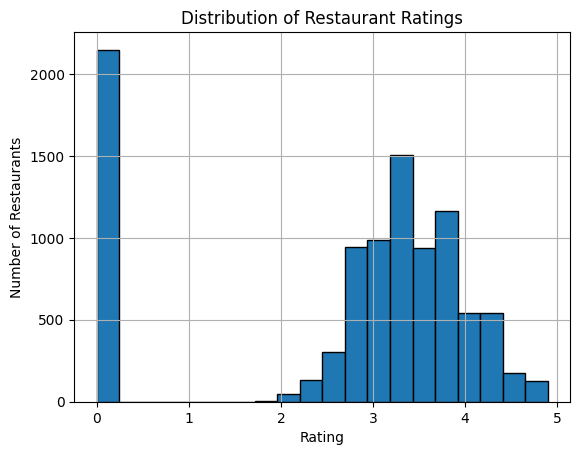

In [13]:
import matplotlib.pyplot as plt

# Distribution of ratings
print("\nDistribution of Ratings:")
data['Aggregate rating'].hist(bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurant Ratings')
plt.show()


# Popular Cuisines Based on Number of Votes

In [14]:
# Popular cuisines based on votes
popular_cuisines = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print("\nPopular Cuisines Based on Votes:")
print(popular_cuisines)



Popular Cuisines Based on Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


# Average Ratings by Cuisine

In [15]:
# Average ratings by cuisine
avg_ratings = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Ratings by Cuisine:")
print(avg_ratings.head(10))



Average Ratings by Cuisine:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


# Filtering Cuisines by Minimum Vote Threshold

In [16]:
# Set a threshold for minimum votes (e.g., 75th percentile)
vote_threshold = data['Votes'].quantile(0.75)
filtered_data = data[data['Votes'] >= vote_threshold]
print("\nFiltered Cuisines by Minimum Vote Threshold:")
print(filtered_data.head())



Filtered Cuisines by Minimum Vote Threshold:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shang

# Comparing Average Ratings Before and After Vote Threshold Filtering

In [17]:
# Average ratings before and after filtering
avg_ratings_filtered = filtered_data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Ratings Before Filtering:")
print(avg_ratings.head(10))
print("\nAverage Ratings After Filtering:")
print(avg_ratings_filtered.head(10))



Average Ratings Before Filtering:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64

Average Ratings After Filtering:
Cuisines
Mughlai, Lucknowi                      4.9
American, Burger, Grill                4.9
North Indian, South Indian, Mughlai    4.9
American, Coffee and Tea               4.9
Continental, Indian                    4.9
Mexican, American, Healthy Food        4.9
Italian, Deli                          4.9
Italian, Bakery, Continental           4.9
European, Asian, Indian                4.9
European, Contemporary                 4.9
Name: Aggregate rating, dtype: float64


# Identifying Top 5 Cuisines in Different Rating Categories

In [18]:
# Categorize ratings
bins = [0, 2, 3, 4, 5]
labels = ['Poor', 'Average', 'Good', 'Excellent']
data['Rating Category'] = pd.cut(data['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)

# Top 5 cuisines in each rating category
for category in labels:
    top_cuisines = data[data['Rating Category'] == category].groupby('Cuisines')['Votes'].count().sort_values(ascending=False).head(5)
    print(f"\nTop 5 Cuisines in {category} Rating Category:")
    print(top_cuisines)



Top 5 Cuisines in Poor Rating Category:
Cuisines
North Indian             445
Chinese                  131
Fast Food                126
North Indian, Chinese    114
Bakery                    88
Name: Votes, dtype: int64

Top 5 Cuisines in Average Rating Category:
Cuisines
North Indian                      214
North Indian, Chinese             182
Chinese                            93
North Indian, Mughlai              92
North Indian, Mughlai, Chinese     71
Name: Votes, dtype: int64

Top 5 Cuisines in Good Rating Category:
Cuisines
North Indian             258
North Indian, Chinese    204
North Indian, Mughlai    178
Cafe                     166
Fast Food                149
Name: Votes, dtype: int64

Top 5 Cuisines in Excellent Rating Category:
Cuisines
Cafe                     28
North Indian, Mughlai    22
Italian                  22
North Indian             19
American                 15
Name: Votes, dtype: int64


# Visualization Ideas

#  Cuisine Popularity Based on Votes

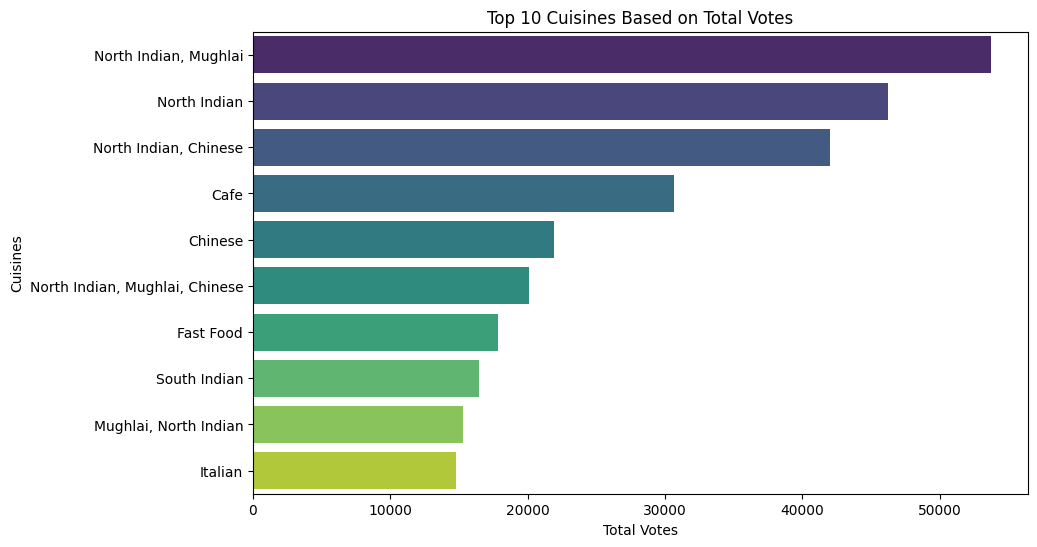

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Group by 'Cuisines', summing votes, and getting the top 10
top_cuisines_votes = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
# Set 'hue' to the index and 'legend' to False in sns.barplot()
sns.barplot(x=top_cuisines_votes.values, y=top_cuisines_votes.index, palette='viridis', hue=top_cuisines_votes.index, legend=False)
plt.title('Top 10 Cuisines Based on Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisines')
plt.show()




# Average Rating Distribution for Top Cuisines

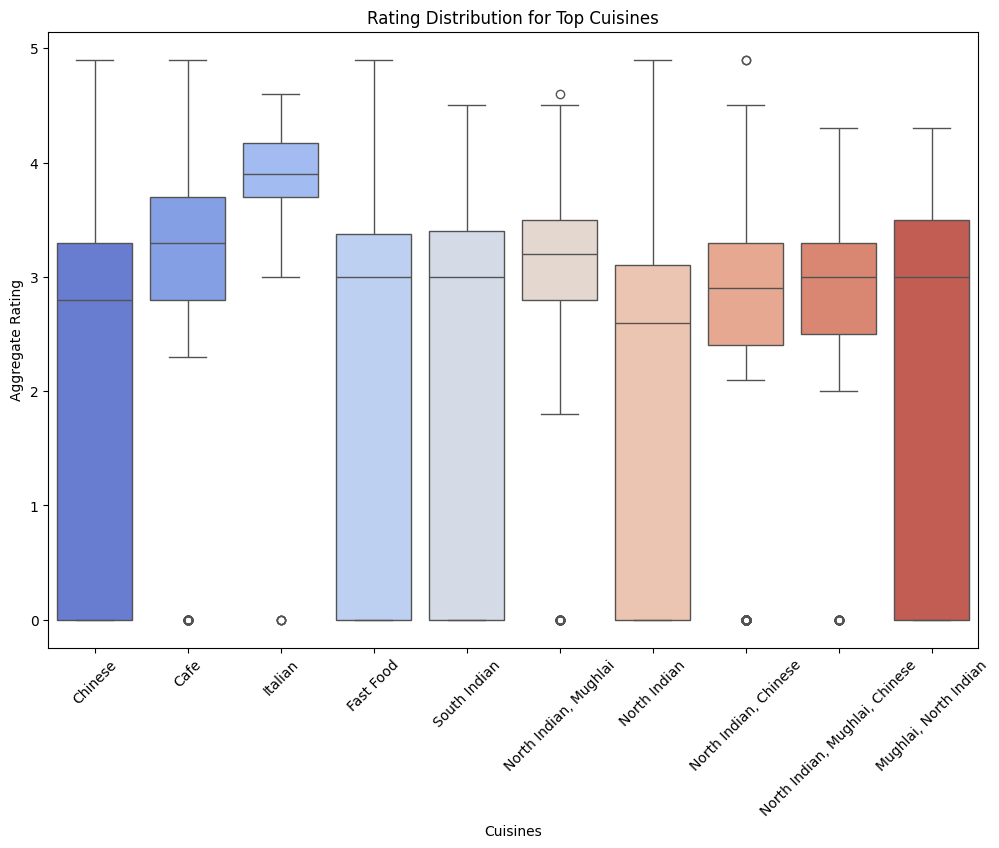

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top cuisines based on votes
top_cuisines = top_cuisines_votes.index.tolist()
data_top_cuisines = data[data['Cuisines'].isin(top_cuisines)]

plt.figure(figsize=(12,8))
sns.boxplot(x='Cuisines', y='Aggregate rating', hue='Cuisines', data=data_top_cuisines, palette='coolwarm', dodge=False)
plt.xticks(rotation=45)
plt.title('Rating Distribution for Top Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Aggregate Rating')
plt.legend([],[], frameon=False) # Hides the legend
plt.show()


# Ratings vs Votes Scatter Plot

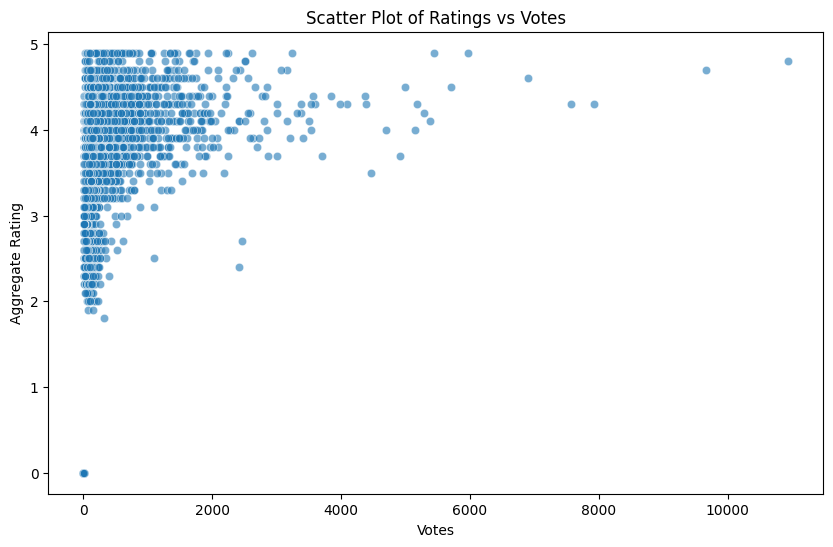

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data, alpha=0.6)
plt.title('Scatter Plot of Ratings vs Votes')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()


# Heatmap of Ratings by Cuisine

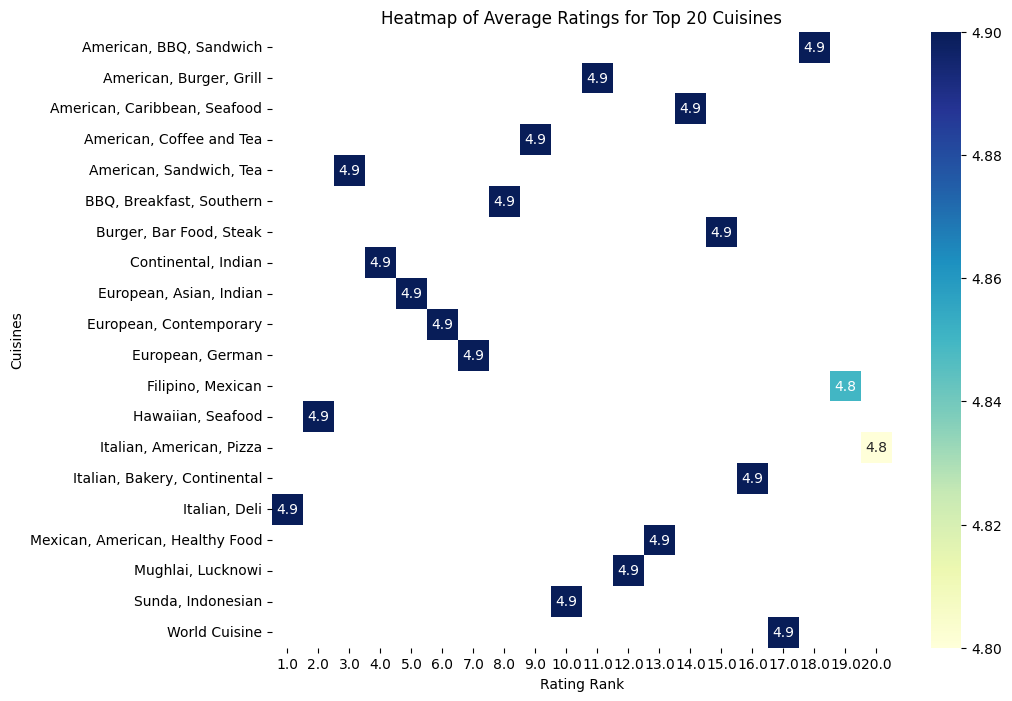

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for heatmap
heatmap_data = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(20)
heatmap_data = heatmap_data.reset_index()
heatmap_data['Rank'] = heatmap_data['Aggregate rating'].rank(method='first', ascending=False)

# Creating a pivot table with keyword arguments
pivot = heatmap_data.pivot(index='Cuisines', columns='Rank', values='Aggregate rating')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=True)
plt.title('Heatmap of Average Ratings for Top 20 Cuisines')
plt.xlabel('Rating Rank')
plt.ylabel('Cuisines')
plt.show()

